## Esercitazione 7 -  9 Aprile 2024

Scrivere la function `NewtonRaphson_corde.py`, che implementa il metodo di Newton-Raphson con la variante delle corde
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

Scrivere la function `NewtonRaphson_sham.py`, che implementa il metodo di Newton-Raphson con la variante di Shamanskii
per il calcolo della soluzione di un sistema di equazioni non lineari. 

    Tale function
deve assumere come dati in input:
- fname: nome della funzione vettoriale di cui calcolare lo zero;
- JacName: nome della funzione che calcola lo J acobiano della funzione vettoriale;
- X0: vettore contenente le componenti dell'iterato iniziale);
- tolx tolleranza  per il test d'arresto sull'incremento
        ||X_{k+1}-X_k||/||X_{k}||<= tolx
- tolf tolleranza per il test del residuo
        ||F(Xk+1)|| <= tolf;
- NMAX numero massimo di iterazioni.
In output devono essere restituiti il vettore contenente l'approssimazione dello zero x, un vettore contenente l'errore relativo tra due iterati successivi, il numero di iterazioni
effettuate, nit.

Risolvere i seguenti tre sistemi non lineari:
1) 
2x0-cos(x1)=0

sin(x0)+2x1=0

2) 
x0^2+x1^2-9=0

x0^2+x1*2-2=0

3) 
4x0^2+x_1^2^=4

x0+x1=sin(x0-x1)

utilizzando il metodo di Newton Raphson, la variante delle corde e la variante di Shamanskii.
Confrontare per ciascun metodo il grafico dell'errore relativo tra due iterati successivi.

## NB: I codici per risolvere l'esercizio 1 sono presenti nella soluzione dell'esercitazione 6.

## Esercizio 2
Implementare il metodo di Newton Raphson per il calcolo del minimo assoluto (relativo) di una funzione non lineare.

Calcolare il punto di minimo delle seguenti due funzioni 
   $$\frac{1}{2}(0.001(x-1)^2+(x^2-y)^2)$$
   $$ (x^2 - y^2)^2 + (x - 1)^2$$
   $$sin\left (\frac{x^2}{2}-\frac{y^2}{4}\right)cos(2x-e^y)$$

In [4]:
def my_newton_minimo(gradiente, Hess, x0, tolx, tolf, nmax):

  """
  DA UTILIZZARE NEL CASO IN CUI CALCOLATE DRIVATE PARZIALI PER GRADIENTE ED HESSIANO SENZA UTILIZZO DI SYMPY
  
  Funzione di newton-raphson per calcolare il minimo di una funzione in più variabili

  Parametri
  ----------
  fun : 
    Nome della funzione che calcola il gradiente della funzione non lineare.
  Hess :  
    Nome della funzione che calcola la matrice Hessiana della funzione non lineare.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore assoluto.
  tolf : float
    Parametro di tolleranza per l'errore relativo.
  nmax : int
    Numero massimo di iterazioni.

  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
    Vettore contenente la norma del passo ad ogni iterazione.
  """

  matHess = Hess(x0)
  if np.linalg.det(matHess) == 0:
    print("La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo")
    return None, None, None
  grad_fx0= gradiente(x0)    
  s = -np.linalg.solve(matHess, gradiente(x0))
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  grad_fx1 = gradiente(x1)
  Xm = [np.linalg.norm(s, 1)]
  
  while it <= nmax and np.linalg.norm(grad_fx1 , 1) >= tolf and np.linalg.norm(s, 1) >= tolx * np.linalg.norm(x1, 1):
     
    x0 = x1
    it += 1
    matHess = Hess(x0)
    grad_fx0=grad_fx1
     
    if np.linalg.det(matHess) == 0:
       
      print("La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo")
      return None, None, None
      

    # Risolvo il sistema lineare avente come matrice dei coefficienti la
    # matrice Hessiana e come termine il vettore gradiente calcolato nell'iterato precedente
    # in x0
    s = -np.linalg.solve(matHess, grad_fx0)
     
    # Aggiornamento della soluzione
    x1 = x0 + s

    #Calcolo del gradiente nel nuovo iterato
    grad_fx1  = gradiente(x1)
    print(np.linalg.norm(s, 1))
    Xm.append(np.linalg.norm(s, 1))

  return x1, it, Xm

In [5]:
def my_newton_minimo_MOD(gradiente, Hess, x0, tolx, tolf, nmax):

  """
  Funzione di newton-raphson per calcolare il minimo di una funzione in più variabili, modificato nel caso in cui si utilizzando sympy 
  per calcolare Gradinete ed Hessiano. Rispetto alla precedente versione cambia esclusivamente il modo di valutare il vettore gradiente e la matrice Hessiana in un punto 
  Parametri
   ----------
  fun : 
    Nome della funzione che calcola il gradiente della funzione non lineare.
  Hess :  
    Nome della funzione che calcola la matrice Hessiana della funzione non lineare.
  x0 : array
    Vettore contenente l'approssimazione iniziale della soluzione.
  tolx : float
    Parametro di tolleranza per l'errore assoluto.
  tolf : float
    Parametro di tolleranza per l'errore relativo.
  nmax : int
    Numero massimo di iterazioni.

  Restituisce
  -------
  x : array
    Vettore soluzione del sistema (o equazione) non lineare.
  it : int
    Numero di iterazioni fatte per ottenere l'approssimazione desiderata.
  Xm : array
    Vettore contenente la norma del passo ad ogni iterazione.
  """

    
  matHess = np.array([[Hess[0, 0](x0[0], x0[1]), Hess[0, 1](x0[0], x0[1])],
                      [Hess[1, 0](x0[0], x0[1]), Hess[1, 1](x0[0], x0[1])]])
 

  gradiente_x0=np.array([gradiente[0](x0[0], x0[1]),gradiente[1](x0[0], x0[1])])
   
  if np.linalg.det(matHess) == 0:
    print("La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo")
    return None, None, None
      
  s = -np.linalg.solve(matHess, gradiente_x0)
  print(s)
  # Aggiornamento della soluzione
  it = 1
  x1 = x0 + s
  grad_fx1=np.array([gradiente[0](x1[0],x1[1]),gradiente[1](x1[0],x1[1])])
  Xm = [np.linalg.norm(s, 1)]
  
  while it <= nmax and np.linalg.norm(grad_fx1, 1) >= tolf and np.linalg.norm(s, 1) >= tolx * np.linalg.norm(x1, 1):
     
    x0 = x1
    it += 1
    matHess = np.array([[Hess[0, 0](x0[0], x0[1]), Hess[0, 1](x0[0], x0[1])],
                      [Hess[1, 0](x0[0], x0[1]), Hess[1, 1](x0[0], x0[1])]])
    grad_fx0=grad_fx1
      
    if np.linalg.det(matHess) == 0:
       
      print("La matrice Hessiana calcolata nell'iterato precedente non è a rango massimo")
      return None, None, None
      

    # Risolvo il sistema lineare avente come matrice dei coefficienti la
    # matrice Hessiana e come termine il vettore gradiente calcolato nell'iterato precedente
    # in x0
                #NB: in fx1 è memorizzato il gradiente nell'iterato attuale
    s = -np.linalg.solve(matHess, grad_fx0)
     
    # Aggiornamento della soluzione
    x1 = x0 + s
    #Aggiorno il gradiente per la prossima iterazione 
    grad_fx1=np.array([gradiente[0](x1[0],x1[1]),gradiente[1](x1[0],x1[1])])
    print(np.linalg.norm(s, 1))
    Xm.append(np.linalg.norm(s, 1))

  return x1, it, Xm

230.99596204106882
120.99710409191226
0.00022120395967139926
5.4373347733713986e-09
Minimo in  [1. 1.] numero di iterazioni  5


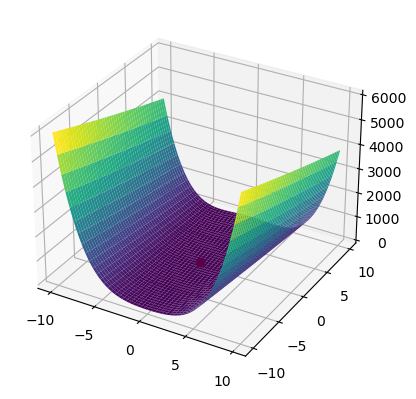

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
#Il comando successivo permette di interagire con i grafici 3D, ruotare la vista


f= lambda x: 0.5*(0.001*(x[0]-1)**2+(x[0]**2-x[1])**2)
gradiente=  lambda x: np.array([2*x[0]**3-2*x[0]*x[1]+0.001*x[0]-0.001,-x[0]**2+x[1]])
Hess= lambda x: np.array([[6*x[0]**2-2*x[1]+0.001, -2*x[0]],[-2*x[0],1]])

x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(x, y)
Z=0.5*(0.001*(X-1)**2+(X**2-Y)**2)

x0=np.array([-10,5])
tolx=1e-10
tolf=1.e-10
nmax=100
xN,contN,XmN= my_newton_minimo(gradiente, Hess, x0, tolx, tolf, nmax)
print("Minimo in ",xN, "numero di iterazioni ",contN)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
plt.plot(0.0,0.0,f(np.array(xN)),'ro')  #Un pallino nel punto di minimo
# Mostra il grafico
plt.show()




3.3108167231926577
2.185091489822552
1.401891264837109
0.7130008063246541
81.40025648725867
27.919887566570637
18.60489960860913
12.389981310754962
8.238233744026374
5.454818955307816
3.5672234348787675
2.2291321552673873
1.0357874965124698
7.3209141604660575
3.369419531599604
1.2872053069675986
14.03134805045683
1.7497729489711622
2.64383863326851
7.085304686364964
2.5164000717126735
16.736151265194287
0.5709175654890453
5.966909040311622
0.0009566870594897559
8.658003254043003e-06
2.7775559628916107e-11
Minimo in  [ 1. -1.] numero di iterazioni  28


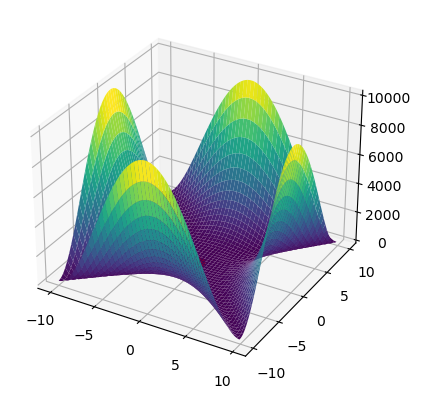

In [7]:
f= lambda x:(x[0]**2-x[1]**2)**2+(x[0]-1)**2
gradiente=  lambda x: np.array([4*x[0]*(x[0]**2 - x[1]**2) + 2*x[0] - 2,-4*x[1]*(x[0]**2 - x[1]**2)])
Hess= lambda x: np.array([[12*x[0]**2 - 4*x[1]**2 + 2,-8*x[0]*x[1]],[-8*x[0]*x[1],-4*x[0]**2 + 12*x[1]**2]])

x = np.arange(-10.0, 10.0, 0.1)
y = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(x, y)
Z= (X**2-Y**2)**2+(X-1)**2

x0=np.array([-10.0,5.0])
tolx=1e-10
tolf=1.e-10
nmax=100
xN,contN,XmN= my_newton_minimo(gradiente, Hess, x0, tolx, tolf, nmax)
print("Minimo in ",xN, "numero di iterazioni ",contN)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
plt.plot(0.0,0.0,f(np.array(xN)),'ro')  #Un pallino nel punto di minimo
# Mostra il grafico
plt.show()

Per la terza funzione test $$sin\left (\frac{x^2}{2}-\frac{y^2}{4}\right)cos(2x-e^y),$$ calcolo gradiente e derivate parziali usando le funzioni sumboliche di sympy.

Si tratta di una funzione non convessa, l'iterato iniziale di permettera di raggiungere uno dei minimi locali

In [8]:
import sympy as sym
from sympy.utilities.lambdify import lambdify
x=sym.symbols('x[0]')
y=sym.symbols('x[1]')
f=sym.sin(x**2/4-y**2/4)*sym.cos(2*x-y)
f_num=lambdify((x,y),f,np)

In [9]:
dfdx=sym.diff(f,x,1)
print('dfdx',dfdx)
dfdy=sym.diff(f,y,1)
print('dfdy',dfdy)
d2fdx2=sym.diff(dfdx,x,1)
print('d2fdx2',d2fdx2)
d2fdxdy=sym.diff(dfdx,y,1)
print('d2fdx2',d2fdxdy)
d2fdy2=sym.diff(dfdy,y,1)
print('d2fdy2',d2fdy2)
gradiente= np.array([lambdify((x,y),dfdx,np),lambdify((x,y),dfdy,np)])
Hess = np.array([[lambdify((x,y),d2fdx2,np),lambdify((x,y),d2fdxdy,np)],[lambdify((x,y),d2fdxdy,np),lambdify((x,y),d2fdy2,np)]])
x0=np.array([-4.0,4.0])
tolx=1e-10
tolf=1.e-10
nmax=100
xN,contN,XmN= my_newton_minimo_MOD(gradiente, Hess, x0, tolx, tolf, nmax)
print("Minimo in ",xN, "numero di iterazioni ",contN)

dfdx x[0]*cos(2*x[0] - x[1])*cos(x[0]**2/4 - x[1]**2/4)/2 - 2*sin(2*x[0] - x[1])*sin(x[0]**2/4 - x[1]**2/4)
dfdy -x[1]*cos(2*x[0] - x[1])*cos(x[0]**2/4 - x[1]**2/4)/2 + sin(2*x[0] - x[1])*sin(x[0]**2/4 - x[1]**2/4)
d2fdx2 -x[0]**2*sin(x[0]**2/4 - x[1]**2/4)*cos(2*x[0] - x[1])/4 - 2*x[0]*sin(2*x[0] - x[1])*cos(x[0]**2/4 - x[1]**2/4) - 4*sin(x[0]**2/4 - x[1]**2/4)*cos(2*x[0] - x[1]) + cos(2*x[0] - x[1])*cos(x[0]**2/4 - x[1]**2/4)/2
d2fdx2 x[0]*x[1]*sin(x[0]**2/4 - x[1]**2/4)*cos(2*x[0] - x[1])/4 + x[0]*sin(2*x[0] - x[1])*cos(x[0]**2/4 - x[1]**2/4)/2 + x[1]*sin(2*x[0] - x[1])*cos(x[0]**2/4 - x[1]**2/4) + 2*sin(x[0]**2/4 - x[1]**2/4)*cos(2*x[0] - x[1])
d2fdy2 -x[1]**2*sin(x[0]**2/4 - x[1]**2/4)*cos(2*x[0] - x[1])/4 - x[1]*sin(2*x[0] - x[1])*cos(x[0]**2/4 - x[1]**2/4) - sin(x[0]**2/4 - x[1]**2/4)*cos(2*x[0] - x[1]) - cos(2*x[0] - x[1])*cos(x[0]**2/4 - x[1]**2/4)/2
[ 0.46348228 -0.46348228]
0.2817329916388507
0.02431579569467082
6.977550447607225e-05
6.639142671526859e-10
Minimo in  [-3.6651

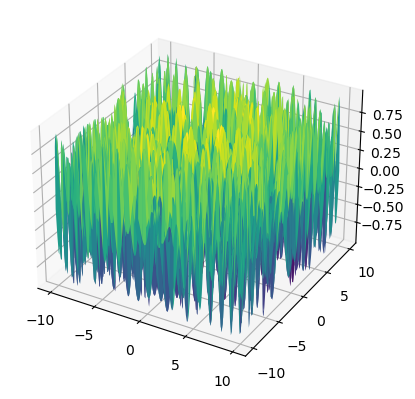

In [10]:
xv = np.arange(-10.0, 10.0, 0.1)
yv = np.arange(-10.0, 10.0, 0.1)
X, Y = np.meshgrid(xv, yv)
#Z= (X**2-Y**2)**2+(X-1)**2
Z= np.sin(X**2/4-Y**2/4)*np.cos(2*X-Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis)
plt.plot(0.0,0.0,f_num(xN[0],xN[1]),'ro')  #Un pallino nel punto di minimo
# Mostra il grafico
plt.show()

## Esercizio 3
Scrivere una funzione numpy che calcola la norma infinito e la norma 1 di un vettore ed una matrice  e testarla su vettori e matrici  a propria scelta. Confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

(Ricorda la formula della norma infinito e della norma 1 di una matrice
$||A||_\infty= \max_{j=1,n} \sum_{i} |a_{ij}| $
$\quad ||A||_1= \max_{i=1,n} \sum_{j} |a_{ij}| $)

In [11]:
#Calcolo della norma 1
def mynorma1(B):
    c=np.sum(np.abs(B),axis=0)  #equivale a sommare gli elementi di tutte le righe 
    #(che equivale a fare la somma degli elementi di ogni colonna)
    n1=np.max(c)
    return n1

In [12]:
#Calcolo della norma infinito
def mynormainf(B):
    c=np.sum(np.abs(B),axis=1)  #equivale a sommare gli elementi di tutte le colonne
    #(che equivale a fare la somma degli elementi di ogni riga)
    ninf=np.max(c)
    return ninf 

In [13]:
B=np.array([[2.0],[3],[4],[5]])
norma1=mynorma1(B)
normainf=mynormainf(B)
print("mynorma1=", norma1)
print("norma 1 con numpy.linalg.norm ", np.linalg.norm(B,1))#Calcolo della norma 1
print("mynormainf=", normainf)
print("norma inf con numpy.linalg.norm ", np.linalg.norm(B,np.inf))

mynorma1= 14.0
norma 1 con numpy.linalg.norm  14.0
mynormainf= 5.0
norma inf con numpy.linalg.norm  5.0


In [14]:
x=np.array([[2],[-3],[7]])
print("norma 1 ",mynorma1(x))

norma 1  12


## Esercizio 4
Implementare una funzione che calcola la norma 2 di una  matrice facendo uso della funzione eigvals del pacchetto numpy.linalg, (np.linalg.eigvals(A)). Testarla sulla matrice A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])   e confrontarne i risultati con quelli ottenuti utilizzando la funzione norm di numpy.linalg

In [15]:
 A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]]) 
ATA=A.T@A
n2=np.sqrt(np.max(np.abs(np.linalg.eigvals(ATA))))
print(n2)

9.056251013341882


In [16]:
def mynorma2(A):
    M=np.dot(A.T,A)
    autovalori=np.linalg.eigvals(M)
    print(autovalori)
    n2=np.sqrt(np.max(np.abs(autovalori)))
    return n2

In [17]:
A=np.array([[4,-1,6],[2,3,-3],[1,-2,9/2]])
norma2=mynorma2(A)
print(np.linalg.det(A))
print("mynorma 2",norma2)
print("norma 2 con numpy.linalg.norm ", np.linalg.norm(A,2))

[8.20156824e+01 1.82343176e+01 4.37114749e-16]
0.0
mynorma 2 9.056251013341882
norma 2 con numpy.linalg.norm  9.056251013341878
